In [22]:
francemapsAntiguo="https://github.com/GaliaGabrielaG/GDF_OFICIAL/raw/main/maps/franceMaps_27561.gpkg"
from  fiona import listlayers


#se importan los maps del antiguo trabajo (quiero los aeropuertos) 
#salen los nombres
listlayers(francemapsAntiguo)

['pais', 'borde', 'departamento', 'regiones', 'airports']

In [23]:
#se seleccionan las layers

import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

regiones=gpd.read_file(francemapsAntiguo,layer='regiones')
departamento=gpd.read_file(francemapsAntiguo,layer='departamento')
airports=gpd.read_file(francemapsAntiguo,layer='airports')
pais=gpd.read_file(francemapsAntiguo,layer='pais')
borde=gpd.read_file(francemapsAntiguo,layer='borde')

In [24]:
#se importa la data de los seamarine
import pandas as pd 
marino_france=pd.read_csv(os.path.join("data","UpdatedPub150.csv"))

#para ver las columnas
marino_france.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [25]:
#le cambiamos el nombre y de todas las columnas escogemos algunas
marino_france.rename(columns={'Main Port Name':'portName'},inplace=True)
marino_france=marino_france.loc[:,['portName', 'Country Code','Latitude','Longitude']]
marino_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3774 non-null   object 
 1   Country Code  3774 non-null   object 
 2   Latitude      3774 non-null   float64
 3   Longitude     3774 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.1+ KB


In [43]:
#lo pasamos a un geodataframe
import geopandas as gpd
france_seaports=gpd.GeoDataFrame(data=marino_france.copy(),
                 geometry=gpd.points_from_xy(marino_france.Longitude,
                                             marino_france.Latitude), 
                 crs=4326)#es el no proyectado

seaports_fra=france_seaports[france_seaports['Country Code']=='France'].copy()

seaports_fra.reset_index(drop=True, inplace=True)

seaports_fra_27561=seaports_fra.to_crs(27561) #crs proyectado

<Axes: >

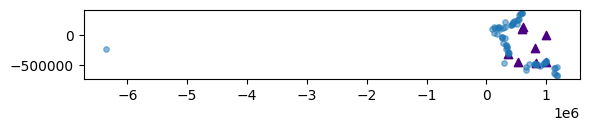

In [48]:
#se junta la info
largeAirports=airports[airports.aeropuertosfrance=='large_airport'] 
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='indigo',marker="^")
seaports_fra_27561.plot(ax=base,alpha=0.5,markersize=15)

In [49]:
#PARA LAS DISTANCIAS
#se averigua cuales son los nombres de los puertos de Francia
seaports_fra_27561.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Baie Du Marigot,France,18.066667,-63.083333,POINT (-6350642.872 -227595.962)
1,Port Du Havre-Antifer,France,49.650000,0.150000,POINT (442142.494 218981.360)
2,Le Verdon,France,45.550000,-1.050000,POINT (335056.486 -233489.399)
3,Villefranche,France,43.700000,7.316667,POINT (1003084.962 -432409.703)
4,Toulon,France,43.100000,5.916667,POINT (893054.541 -505787.647)


In [50]:
#se averigua cuales son los nombres de los aeropuertos grandes de Francia
largeAirports.head()

,name,aeropuertosfrance,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Charles de Gaulle International Airport,large_airport,49.012798,2.550000,392.0,Île-de-France,Paris,POINT (615616.663 145851.646)
1,Paris-Orly Airport,large_airport,48.723330,2.379440,291.0,Île-de-France,Paris,POINT (603158.734 113641.374)
2,Nice-Côte d'Azur Airport,large_airport,43.658401,7.215870,12.0,Provence-Alpes-Côte-d'Azur,Nice,POINT (995238.561 -437578.033)
3,Marseille Provence Airport,large_airport,43.439272,5.221424,74.0,Provence-Alpes-Côte-d'Azur,Marseille,POINT (834724.877 -470354.012)
4,EuroAirport Basel-Mulhouse-Freiburg Airport,large_airport,47.590000,7.529167,885.0,Grand Est,Bâle/Mulhouse,POINT (990422.472 1054.773)


In [51]:
# distance between 'Guarulhos' and 'Dtse / Gegua Oil Terminal' in km
largeAirports.iloc[0].geometry.distance(seaports_fra_27561.iloc[0].geometry)/1000

6976.262253529231

In [52]:
#hacemos todas las distancias
#try 1
seaports_fra_27561.geometry.apply\
(lambda g: largeAirports.geometry.distance(g)/1000)

#en la columna- fila 0-0 coincide el dato anterior
#van a salir todas las distancias


,0,1,2,3,4,5,6,7
0,6976.262254,6962.169181,7348.881991,7189.467377,7344.625351,6875.452160,7164.683432,6709.160787
1,188.258446,192.412947,858.478594,793.286949,590.002484,676.742196,572.282590,540.538332
2,471.819501,438.609836,691.008352,552.967762,696.071507,287.855842,479.293994,84.625626
3,696.073179,676.840281,9.395618,172.582991,433.649386,482.421522,287.360041,655.739875
4,708.241163,683.909271,122.858152,68.248751,516.110214,375.653446,300.371955,568.113651
...,...,...,...,...,...,...,...,...
60,146.616788,171.521515,842.048759,799.557417,520.526398,729.907008,559.255539,621.188718
61,631.332656,601.620697,287.095927,123.940174,554.770143,191.576336,281.733268,389.007036
62,432.400690,399.626952,695.601690,563.935449,673.696268,315.794174,469.949889,124.476956
63,430.111826,397.257342,691.913783,560.482887,670.025756,313.502704,466.065374,123.957358


In [55]:
# try 2
seaports_fra_27561.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

#se le cambia el nombre

name,Charles de Gaulle International Airport,Paris-Orly Airport,Nice-Côte d'Azur Airport,Marseille Provence Airport,EuroAirport Basel-Mulhouse-Freiburg Airport,Toulouse-Blagnac Airport,Lyon Saint-Exupéry Airport,Bordeaux-Mérignac Airport
portName,,,,,,,,
Baie Du Marigot,6976.262254,6962.169181,7348.881991,7189.467377,7344.625351,6875.452160,7164.683432,6709.160787
Port Du Havre-Antifer,188.258446,192.412947,858.478594,793.286949,590.002484,676.742196,572.282590,540.538332
Le Verdon,471.819501,438.609836,691.008352,552.967762,696.071507,287.855842,479.293994,84.625626
Villefranche,696.073179,676.840281,9.395618,172.582991,433.649386,482.421522,287.360041,655.739875
Toulon,708.241163,683.909271,122.858152,68.248751,516.110214,375.653446,300.371955,568.113651
...,...,...,...,...,...,...,...,...
Saint-Valery-Sur-Somme,146.616788,171.521515,842.048759,799.557417,520.526398,729.907008,559.255539,621.188718
Sete,631.332656,601.620697,287.095927,123.940174,554.770143,191.576336,281.733268,389.007036
Rochefort,432.400690,399.626952,695.601690,563.935449,673.696268,315.794174,469.949889,124.476956


In [57]:
#try 3
seaports_fra_27561.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
#ya que no esta en orden alfabético se le ubica

name,Bordeaux-Mérignac Airport,Charles de Gaulle International Airport,EuroAirport Basel-Mulhouse-Freiburg Airport,Lyon Saint-Exupéry Airport,Marseille Provence Airport,Nice-Côte d'Azur Airport,Paris-Orly Airport,Toulouse-Blagnac Airport
portName,,,,,,,,
Ambes,25.476279,502.713221,684.363184,447.781794,493.882302,638.277808,468.510771,216.864264
Antibes,644.681666,700.153589,447.428805,289.344155,156.221933,10.727412,680.119042,468.035023
Baie Du Marigot,6709.160787,6976.262254,7344.625351,7164.683432,7189.467377,7348.881991,6962.169181,6875.452160
Bastia,855.321277,884.116979,565.678155,486.536560,356.121275,211.746610,868.065662,669.146935
Bayonne,160.003853,687.590536,837.899128,577.303830,543.869821,704.654980,653.328414,230.270398
...,...,...,...,...,...,...,...,...
St Nazaire,296.569768,402.353270,734.573638,585.534394,722.853339,840.491851,377.378070,493.681254
Tonnay Charente,123.957358,430.111826,670.025756,466.065374,560.482887,691.913783,397.257342,313.502704
Toulon,568.113651,708.241163,516.110214,300.371955,68.248751,122.858152,683.909271,375.653446


In [58]:
#se procede a guardar la matrix
distanceMatrixKM_sea_air= seaports_fra_27561.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [59]:
#con el codigo de arriba se puede hacer varias variaciones:
#la distancia media desde un puerto marítimo a todos los grandes aeropuertos (ordenados)
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)

portName
Fos                           377.530330
Port-de-Bouc                  378.699807
Port Saint Louis Du Rhone     379.661918
Sete                          382.634530
Marseille                     388.593306
                                ...     
Bonifacio                     694.482425
Morlaix                       701.635154
Port De Roscoff-Bloscon       717.121564
Rade De Brest                 736.304075
Baie Du Marigot              7071.337816
Length: 65, dtype: float64

In [65]:
#hallamos datos como la media, min, max
#el ejercicio pedía mín pero realicé todos para practicar
estadisticas=pd.DataFrame()
estadisticas['mean']=distanceMatrixKM_sea_air.mean(axis=1)
estadisticas['min']=distanceMatrixKM_sea_air.min(axis=1)
estadisticas['max']=distanceMatrixKM_sea_air.max(axis=1)
estadisticas.head()

,mean,min,max
portName,,,
Ambes,434.733703,25.476279,684.363184
Antibes,424.588953,10.727412,700.153589
Baie Du Marigot,7071.337816,6709.160787,7348.881991
Bastia,612.091682,211.746610,884.116979
Bayonne,549.365120,160.003853,837.899128


In [67]:
#aeropuerto más lejano a cada puerto marítimo
distanceMatrixKM_sea_air.idxmax(axis="columns")

portName
Ambes              EuroAirport Basel-Mulhouse-Freiburg Airport
Antibes                Charles de Gaulle International Airport
Baie Du Marigot                       Nice-Côte d'Azur Airport
Bastia                 Charles de Gaulle International Airport
Bayonne            EuroAirport Basel-Mulhouse-Freiburg Airport
                                      ...                     
St Nazaire                            Nice-Côte d'Azur Airport
Tonnay Charente                       Nice-Côte d'Azur Airport
Toulon                 Charles de Gaulle International Airport
Treguier                              Nice-Côte d'Azur Airport
Villefranche           Charles de Gaulle International Airport
Length: 65, dtype: object

In [68]:
# aeropuerto más cercano a cada puerto marítimo
distanceMatrixKM_sea_air.idxmin(axis="columns")

portName
Ambes               Bordeaux-Mérignac Airport
Antibes              Nice-Côte d'Azur Airport
Baie Du Marigot     Bordeaux-Mérignac Airport
Bastia               Nice-Côte d'Azur Airport
Bayonne             Bordeaux-Mérignac Airport
                              ...            
St Nazaire          Bordeaux-Mérignac Airport
Tonnay Charente     Bordeaux-Mérignac Airport
Toulon             Marseille Provence Airport
Treguier                   Paris-Orly Airport
Villefranche         Nice-Côte d'Azur Airport
Length: 65, dtype: object

In [69]:
# puerto marítimo más cercano a cada aeropuerto
distanceMatrixKM_sea_air.idxmin(axis="rows")

name
Bordeaux-Mérignac Airport                              Bordeaux
Charles de Gaulle International Airport           Port Of Rouen
EuroAirport Basel-Mulhouse-Freiburg Airport        Villefranche
Lyon Saint-Exupéry Airport                                  Fos
Marseille Provence Airport                            Marseille
Nice-Côte d'Azur Airport                                   Nice
Paris-Orly Airport                                Port Of Rouen
Toulouse-Blagnac Airport                       Port-La-Nouvelle
dtype: object

In [70]:
#-----------------------------------------------------------------------------------------------------------

NameError: name 'rivers' is not defined